In [1]:
from IPython import display

import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional  as F

In [4]:
import scipy.stats as stats

## STEP 1 :  Get the Data

In [5]:
# Import and process the data

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

wine = pd.read_csv(url,sep=';')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## STEP 2 : Basic information about data

#### (i) For finding number of rows and columns

In [6]:
wine.shape

(1599, 12)

#### (ii) To see number of null values , datatypes and memory usage

In [7]:
wine.info()

# 'TotalCharges' column has object datatype but it should be of float datatype.
#  need to change the dtype.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### (iii) Finding Duplicate rows

In [9]:
wine[wine.duplicated(keep="first")]

# Below are duplicate rows in the DF

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [10]:
wine = wine.drop_duplicates(inplace = False , ignore_index=True)
wine.shape
# Earlier shape : (1599, 12)

(1359, 12)

#### (iv) Applying basic statstical computations on the dataset

- Extreme values (min & max values), 
- count of data points, 
- Quantiles, 
- mean ,
- standard deviation, etc.

In [11]:
wine.describe()

# Data columns have different range : need Data- Normalization

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Fetching numerical and categorical columns

In [12]:
from pandas.api.types import is_string_dtype, is_numeric_dtype

num_list = []
cat_list = []

for column in wine:
    
    if is_numeric_dtype(wine[column]):
        num_list.append(column)
        
    elif is_string_dtype(wine[column]):
        cat_list.append(column)



print('Numerical attributes : ',num_list,'\n')

print('Categorical attributes : ',cat_list)

Numerical attributes :  ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality'] 

Categorical attributes :  []


## STEP 3 : UNIVARIATE ANALYSIS

### (i) Histogram  for Numerical  attributes.

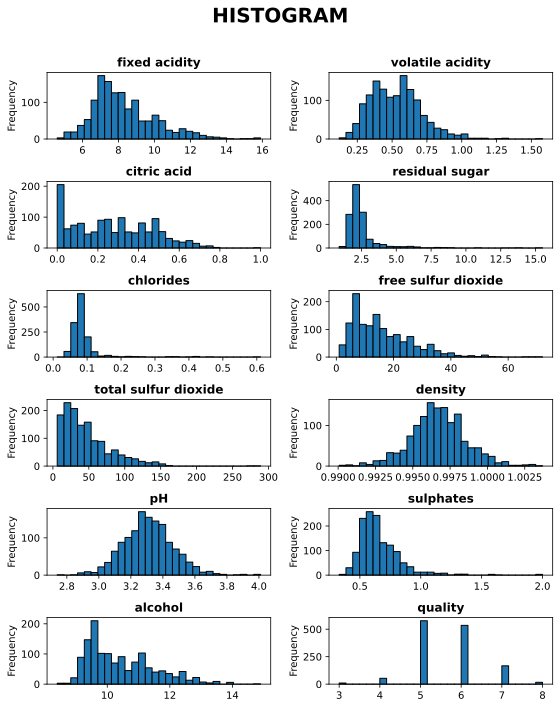

In [13]:
total_size1 = len(num_list) 

n_cols1 = 2
n_rows1 = int(np.ceil(total_size1/n_cols1))

fig1,axes1 = plt.subplots(nrows = n_rows1 ,ncols = n_cols1 , figsize = (8,10))

i = 0
j = 0

fig1.suptitle("HISTOGRAM \n", fontweight="bold" ,fontsize=20)
for col in num_list:
    fig1.tight_layout()
    axes2 = wine[col].plot(ax = axes1[i,j] , kind = 'hist' , bins = 30 , title  = col , ec = 'black')
    axes2.set_title(f"{col}",fontweight="bold" ,fontsize=12)
    
    if j == n_cols1 -1:
        
        i +=1
        j = 0
        
    else :
        j+=1
        


#### Conclusion :
- **quality** column (predicted column) : imbalance

### (iv) Boxplot for numerical attributes for finding the outleirs

In [14]:
len(num_list)

12

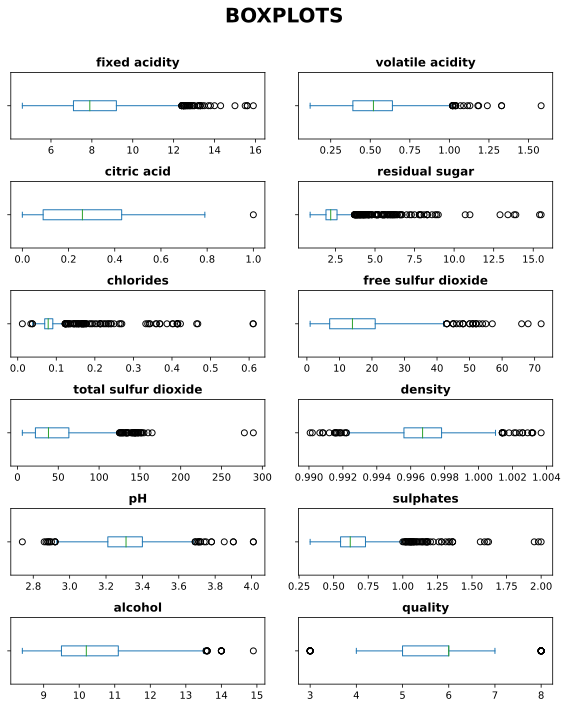

In [15]:
total_size_num = len(num_list) 
 
n_cols=2
n_rows= int(np.ceil(total_size_num/n_cols))

fig2, axes2 = plt.subplots(nrows=n_rows, ncols=n_cols , figsize = (8,10),)

i = 0
j = 0


fig2.suptitle("BOXPLOTS\n", fontweight="bold" ,fontsize=20)

for col in num_list:
    
    fig2.tight_layout()
 
    
    axes3 = wine[col].plot.box(ax = axes2[i,j],vert = 0)
    axes3.set_title(f"{col}",fontweight="bold" ,fontsize=12)
    
    axes3.set(yticklabels=[])
    
    if j == n_cols-1:
        i = i + 1
        j = 0
    
    else:
        j = j + 1
    

In [16]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [17]:
wine[wine["chlorides"] > 0.5]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
135,9.2,0.52,1.00,3.4,0.610,32.0,69.0,0.9996,2.74,2.00,9.4,4
226,7.7,0.41,0.76,1.8,0.611,8.0,45.0,0.9968,3.06,1.26,9.4,5


In [18]:
wine_Cl_bool = wine["chlorides"] > 0.5

In [19]:
wine[wine["total sulfur dioxide"] > 250]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
918,7.9,0.3,0.68,8.3,0.05,37.5,278.0,0.99316,3.01,0.51,12.3,7
920,7.9,0.3,0.68,8.3,0.05,37.5,289.0,0.99316,3.01,0.51,12.3,7


In [20]:
wine_SO2_bool = wine["total sulfur dioxide"] > 250

In [21]:
wine[wine["sulphates"] > 1.75]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
80,8.6,0.49,0.28,1.9,0.11,20.0,136.0,0.9972,2.93,1.95,9.9,6
85,8.6,0.49,0.29,2.0,0.11,19.0,133.0,0.9972,2.93,1.98,9.8,5
135,9.2,0.52,1.00,3.4,0.61,32.0,69.0,0.9996,2.74,2.00,9.4,4


In [22]:
wine_S_bool = wine["sulphates"] > 1.75

In [23]:
outliers_OR_cond_bool = wine_Cl_bool | wine_SO2_bool | wine_S_bool

In [24]:
wine[outliers_OR_cond_bool]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
80,8.6,0.49,0.28,1.9,0.110,20.0,136.0,0.99720,2.93,1.95,9.9,6
85,8.6,0.49,0.29,2.0,0.110,19.0,133.0,0.99720,2.93,1.98,9.8,5
135,9.2,0.52,1.00,3.4,0.610,32.0,69.0,0.99960,2.74,2.00,9.4,4
226,7.7,0.41,0.76,1.8,0.611,8.0,45.0,0.99680,3.06,1.26,9.4,5
918,7.9,0.30,0.68,8.3,0.050,37.5,278.0,0.99316,3.01,0.51,12.3,7
920,7.9,0.30,0.68,8.3,0.050,37.5,289.0,0.99316,3.01,0.51,12.3,7


#### Filtering Outliers

In [25]:
wine = wine[~outliers_OR_cond_bool]

In [26]:
wine.shape

(1353, 12)

## STEP - 4 : Bi-Variate Analysis

- Multivariate analysis is categorized into these three conditions to address various combinations of
  numerical variables and categorical variables.

### (i) Numerical vs. Numerical → heat map or pairplot

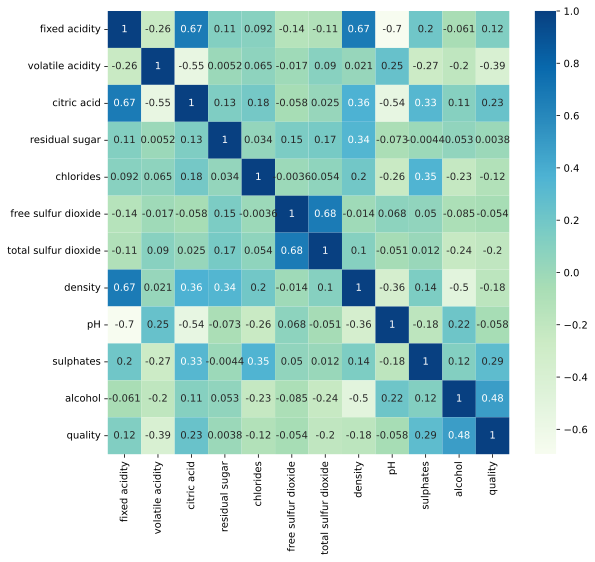

In [27]:
correlation = wine.corr(numeric_only =True)
plt.figure(figsize = (9,8))
sns.heatmap(correlation,cmap = 'GnBu' , annot = True)

plt.show()

### (ii) pairplot with hue

In [28]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [29]:
# cols2plot = ['alcohol','fixed acidity','volatile acidity','citric acid','quality','density' , 'free sulfur dioxide', 'total sulfur dioxide']

# sns.pairplot(wine[cols2plot],kind='reg',hue='quality')
# plt.show()

## STEP 5 : Export the DF

In [30]:
wine.to_csv('wine_clean_dataset_after_EDA.csv')